#  ÌôïÎ•†Î∂ÑÌè¨ 

### ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨

In [1]:
!pip install numpy


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

### Í∏∞Î≥∏ ÏÑ§Ï†ï

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 'ÎßëÏùÄ Í≥†Îîï'ÏúºÎ°ú ÏÑ§Ï†ï 
plt.rcParams['axes.unicode_minus'] = False     # Í∑∏ÎûòÌîÑÏóêÏÑú (-)Ïà´ÏûêÌëúÏãú

In [5]:
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÜåÏàòÏ†ê ÌëúÏãú
%precision 3

'%.3f'

## 1.Ïù¥ÏÇ∞ÌôïÎ•†Î∂ÑÌè¨

### Ïù¥ÏÇ∞ÌôïÎ•†Î≥ÄÏàòÏóêÏÑú Îã§Î£¨ ÎÇ¥Ïö©(Ìï®Ïàò)
-Ïòà: Ï£ºÏÇ¨ÏúÑÎ•º ÎçòÏ°åÏùÑ Îïå 5ÎòêÎäî 6Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞ 

- ÏÉÅÌÉúÍ≥µÍ∞Ñ

In [6]:
# ex:Îëê Ï£ºÏÇ¨ÏúÑ ÎààÏù¥ Ï∞®Ïùò Ï†àÎåÄÍ∞í
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
        
x_set = np.array(list(set(X)))

- ÌôïÎ•†ÏßàÎüâÌï®Ïàò: f(x)

In [7]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

- ÌôïÎ•†Î≥ÄÏàò

In [8]:
X = [x_set, f]

-  ÌôïÎ•†

In [9]:
prob = np.array([ f(x_k) for x_k in x_set])

---------------------------------------------------------------------

- ÌèâÍ∑†=Í∏∞ÎåÄÍ∞í(E(X))

In [10]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

In [11]:
#g(x) Ìï®ÏàòÏãù ÏÇ¨Ïö©
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- Î∂ÑÏÇ∞(V(X))

In [12]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

In [13]:
#g(x) Ìï®ÏàòÏãù ÏÇ¨Ïö©
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- ÌôïÎ•†ÏùÑ Ïù¥Ïö©Ìïú Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞ Ï∂úÎ†•

In [14]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'Í∏∞ÎåÄÍ∞í E(X): {E(X):.4}')
    print(f'Î∂ÑÏÇ∞   V(X): {V(X):.4}')

- ÌôïÎ•†Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ

In [15]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #Í∏∞ÎåÄÍ∞í:ÌèâÍ∑†
    ax.set_xticks(np.append(x_set, E(X)))   #xÏ∂ïÏùò Í∞í Ï∂úÎ†•
    ax.set_ylim(0, prob.max()*1.2)          #yÏ∂ïÏùò ÌïúÍ≥Ñ ÏßÄÏ†ï
    ax.legend()
    for x, y in zip(x_set, prob):
        ax.text(x, y, round(y,4))
    
    plt.show()    

### ÌôïÎ•†Î∂ÑÌè¨ Í¥ÄÎ†® ÌååÏù¥Ïç¨ ÎùºÏù¥Î∏åÎü¨Î¶¨ : Scipy

In [16]:
# scipy ÏàòÏπòÌï¥ÏÑùÍ∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî ÌååÏù¥Ïç¨ Ìå®ÌÇ§ÏßÄ
# scipyÏùò ÏÑúÎ∏åÌå®ÌÇ§ÏßÄÎì± Ï§ë statsÎäî ÌôïÎ•†Î∂ÑÌè¨ Î∂ÑÏÑù Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïúÎã§.
import scipy as sp
import scipy.stats

#### scipy ÌôïÎ•†Î∂ÑÌè¨ ÌÅ¥ÎûòÏä§
- Ïù¥ÏÇ∞ : bernoulli (Î≤†Î•¥ÎàÑÏù¥Î∂ÑÌè¨)- Ïù¥ÏßÑÎ∂ÑÎ•ò
- Ïù¥ÏÇ∞ : binom (Ïù¥Ìï≠Î∂ÑÌè¨) - Ïù¥ÏßÑÎ∂ÑÎ•ò
- Ïù¥ÏÇ∞ : multinomial (Îã§Ìï≠Î∂ÑÌè¨) - Îã§Ï§ëÎ∂ÑÎ•ò
- Ïù¥ÏÇ∞ : geometric(Í∏∞ÌïòÎ∂ÑÌè¨)
- Ïù¥ÏÇ∞ : poisson (Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨)

- Ïó∞ÏÜç : uniform (Í∑†ÏùºÎ∂ÑÌè¨)
- Ïó∞ÏÜç : norm (Ï†ïÍ∑úÎ∂ÑÌè¨)
- Ïó∞ÏÜç : beta (Î≤†ÌÉÄÎ∂ÑÌè¨)
- Ïó∞ÏÜç : gamma (Í∞êÎßàÎ∂ÑÌè¨)
- Ïó∞ÏÜç : t (Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨)
- Ïó∞ÏÜç : f (FÎ∂ÑÌè¨)
- Ïó∞ÏÜç : chi2 (Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨)
- Ïó∞ÏÜç : dirichlet (ÎîîÎ¶¨ÌÅ¥Î¶¨Î∂ÑÌè¨)    
- Ïó∞ÏÜç : multivariate_normal (Îã§Î≥ÄÏàò Ï†ïÍ∑úÎ∂ÑÌè¨)

#### ÌôïÎ•†Î∂ÑÌè¨ ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©Î∞©Î≤ï

In [17]:
# Ï†ïÍ∑úÎ∂ÑÌè¨ ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö© Î∞©Î≤ï
rv = sp.stats.norm()

# Î™®ÏàòÏßÄÏ†ïÌïòÏó¨ ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö© Î∞©Î≤ï
# loc: Î∂ÑÌè¨Ïùò Í∏∞ÎåÄÍ∞í
# scale : Î∂ÑÌè¨Ïùò ÌëúÏ§ÄÌé∏Ï∞®
rv = sp.stats.norm(loc=1, scale=2) # Í∏∞ÎåÄÍ∞í1 ÌëúÏ§ÄÌé∏Ï∞®2Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ùÏ≤¥

#### Scipy ÌôïÎ•†Î∂ÑÌè¨ Î©îÏÑúÎìú
- pmf : ÌôïÎ•†ÏßàÎüâÌï®Ïàò(probability mass function) 
- pdf : ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò(probability density function)
- cdf : ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò(cumulative distibution function)
- ppf : ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®ÏàòÏùò Ïó≠Ìï®Ïàò(inverse cumulative distibution function)
- sf  : ÏÉùÏ°¥Ìï®Ïàò(survival function) = 1 - ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò
- isf : ÏÉùÏ°¥Ìï®ÏàòÏùò Ïó≠Ìï®Ïàò(inverse survival function)
- rvs : ÎûúÎç§ ÌëúÎ≥∏ ÏÉùÏÑ±(random variable sampling)

#### ÌôïÎ•†Î∂ÑÌè¨ Î©îÏÑúÎìú ÏÇ¨Ïö©Î∞©Î≤ï 
- ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò(probability density function)

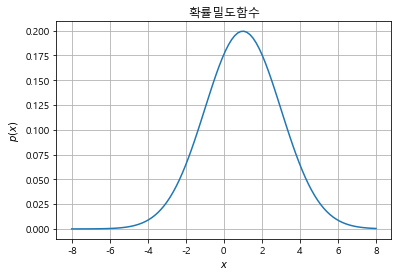

In [18]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title('ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()
plt.show()

- ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò(cumulative distibution function)

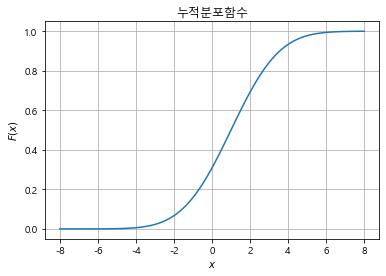

In [19]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title('ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.grid()
plt.show()

- ÎûúÎç§ ÌëúÎ≥∏ ÏÉùÏÑ±(random variable sampling)

In [20]:
# size = ÌëúÎ≥∏ ÏÉùÏÑ±Ïãú ÏÉùÏÑ±Îê† ÌëúÎ≥∏ ÌÅ¨Í∏∞
# random_state = ÌëúÎ≥∏ ÏÉùÏÑ±Ïãú ÏÇ¨Ïö©ÎêòÎäî ÏãúÎìú(seed)Í∞í
rv.rvs(size=(3,5), random_state=0)

array([[ 4.528,  1.8  ,  2.957,  5.482,  4.735],
       [-0.955,  2.9  ,  0.697,  0.794,  1.821],
       [ 1.288,  3.909,  2.522,  1.243,  1.888]])

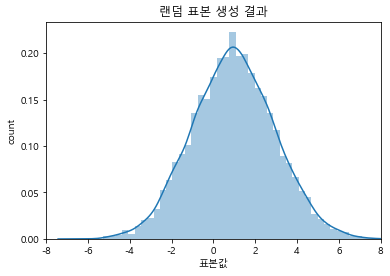

In [21]:
import seaborn as sns
sns.distplot( rv.rvs(size=10000, random_state=0) )
plt.title('ÎûúÎç§ ÌëúÎ≥∏ ÏÉùÏÑ± Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

--------

### 1.Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨(Bernoulli distribution)
ÏÑ±Í≥µÎ•†Ïù¥ $p$Ïù∏ Î≤†Î•¥ÎàÑÏù¥ Ïã§ÌóòÏóêÏÑú ÏÑ±Í≥µÏù¥Î©¥ $X=1$, Ïã§Ìå®Ïù¥Î©¥ $X=0$Ïù¥Îùº Ìï† Îïå, ÌôïÎ•†Î≥ÄÏàò XÏùò ÌôïÎ•†Î∂ÑÌè¨ 

- $X \sim B(1, p) = X \sim B(x, \mu) = \mu^x(1 - \mu)^(1-x) $
- $E(X)=p$
- $V(X)=p(1-p)$

In [22]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0

    return x_set, f

In [23]:
p = 1/3   #ÏÑ±Í≥µÌôïÎ•† p
X = Bern(p)

- ÌèâÍ∑†(Í∏∞ÎåÄÍ∞í)Í≥º Î∂ÑÏÇ∞

In [24]:
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 0.3333
Î∂ÑÏÇ∞   V(X): 0.2222


- ÌôïÎ•†Î≥ÄÏàò X Í∑∏ÎûòÌîÑ

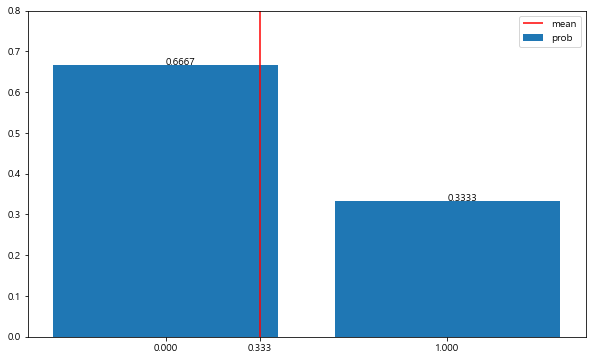

In [25]:
plot_prob(X)

#### * scipy bernoulli()

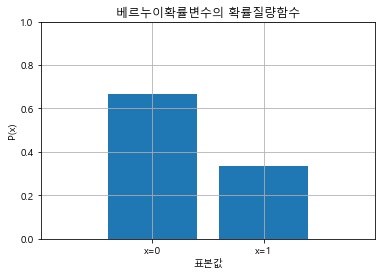

In [26]:
mu = 1/3
rv = sp.stats.bernoulli(mu)

# ÌôïÎ•†ÏßàÎüâÌï®Ïàò pmf() Î©îÏÑúÎìú ÏÇ¨Ïö©Ìï¥ÏÑú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('P(x)')
plt.title('Î≤†Î•¥ÎàÑÏù¥ÌôïÎ•†Î≥ÄÏàòÏùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')
plt.grid()
plt.show()

#### # Î≤†Î•¥ÎàÑÏù¥ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

[0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0]


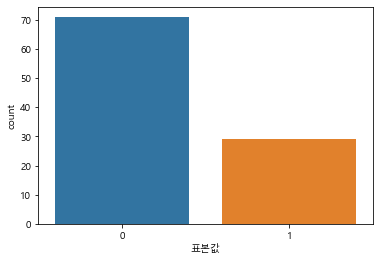

In [27]:
# Î≤†Î•¥ÎàÑÏù¥ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±
mu = 1/3
rv = sp.stats.bernoulli(mu)
x = rv.rvs(100, random_state=0)
print(x)

sns.countplot(x)
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.show()

### [Ïã§Ïäµ] Î≤†Î•¥ÎàÑÏù¥Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌëúÎ≥∏Ïùò Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÍ≥† Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨ÏãúÏò§.
1. $mu = 0.5$, ÌëúÎ≥∏Ïù¥ 10Í∞úÏù∏ Í≤ΩÏö∞, 
2. $mu = 0.5$,  ÌëúÎ≥∏Ïù¥ 100Í∞úÏù∏ Í≤ΩÏö∞

Í∏∞ÎåÄÍ∞í: 0.5, Î∂ÑÏÇ∞: 0.25


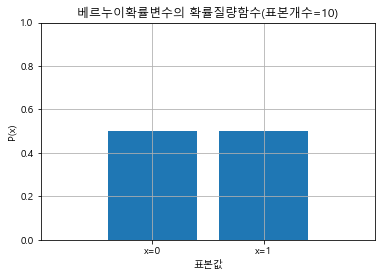

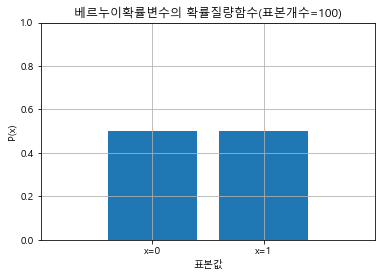

In [28]:
def plot_bernoulli(mu, M):    
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(size=M, random_state=0)
    
    # ÌôïÎ•†ÏßàÎüâÌï®Ïàò pmf() Î©îÏÑúÎìú ÏÇ¨Ïö©Ìï¥ÏÑú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.bar(x, rv.pmf(x))
    plt.xlim(-1, 2)
    plt.ylim(0, 1)
    plt.xticks([0,1], ['x=0','x=1'])
    plt.xlabel('ÌëúÎ≥∏Í∞í')
    plt.ylabel('P(x)')
    plt.title(f'Î≤†Î•¥ÎàÑÏù¥ÌôïÎ•†Î≥ÄÏàòÏùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò(ÌëúÎ≥∏Í∞úÏàò={M})')
    plt.grid()
    plt.show()

mu = 0.5    
print(f'Í∏∞ÎåÄÍ∞í: {mu}, Î∂ÑÏÇ∞: {mu*(1-mu)}')
plot_bernoulli(0.5, 10)
plot_bernoulli(0.5, 100)

### 2.Ïù¥Ìï≠Î∂ÑÌè¨(binomial distributuin)
Îß§Ìöå ÏÑ±Í≥µÎ•†Ïù¥ $p$Ïù∏ Î≤†Î•¥ÎàÑÏù¥ Ïã§ÌóòÏùÑ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú $n$Î≤à Î∞òÎ≥µÌï† Îïå, ÏÑ±Í≥µÌïú ÌöüÏàò$(X)$Ïùò ÌôïÎ•†Î∂ÑÌè¨Î•º Î™®Ïàò $n$Í≥º $p$Ïù∏ Ïù¥Ìï≠Î∂ÑÌè¨

- $X \sim B(n, p)$ :  $_{n}\mathrm{C}_{k}p^{x}q^{n-x}$
- $E(X)=np$
- $V(X)=np(1-p)$

#### * Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò f(x)

In [29]:
#scipyÌå®ÌÇ§ÏßÄÏùò specialÎ™®ÎìàÏóê ÏûàÎäî combÌï®Ïàò ÏÇ¨Ïö©
import numpy as np
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

n, p = 6, 0.4
X = Bin(n, p)
X

(array([0, 1, 2, 3, 4, 5, 6]), <function __main__.Bin.<locals>.f(x)>)

Í∏∞ÎåÄÍ∞í E(X): 2.4
Î∂ÑÏÇ∞   V(X): 1.44


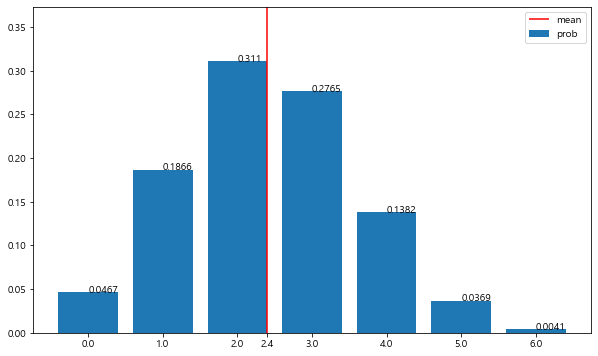

In [30]:
# Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

# Í∑∏ÎûòÌîÑ
plot_prob(X)

#### * scipy.statsÏóê ÏûàÎäî Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò : scipy.stats.binom(n, mu)

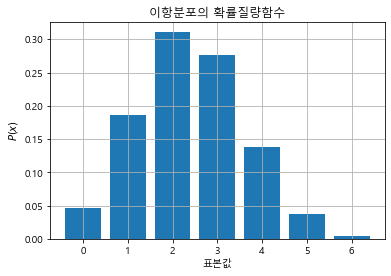

In [32]:
n = 6
mu = 0.4
rv = sp.stats.binom(n, mu)

xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')
plt.title('Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')
plt.grid()
plt.show()

#### * scipy.statsÏóê ÏûàÎäî Ïù¥Ìï≠Î∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

[3 3 3 3 2 3 2 4 5 2 3 2 3 4 1 1 0 4 3 4 5 3 2 3 1 3 1 4 2 2 2 3 2 3 0 3 3
 3 4 3 2 2 3 1 3 3 1 1 2 2 3 2 5 1 1 1 3 2 2 2 1 1 3 1 1 2 4 1 4 1 5 2 5 3
 3 0 2 1 2 1 2 2 1 3 3 2 2 1 3 4 2 3 1 3 2 1 3 0 4 0]


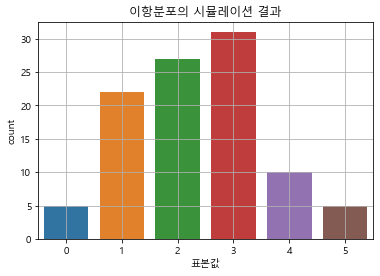

In [33]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x)
plt.title('Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.grid()
plt.show()

### [ÏòàÏ†ú]  Ïù¥Ìï≠Î∂ÑÌè¨ ÌôïÎ•† Íµ¨ÌïòÍ∏∞

ÏµúÍ∑ºÏùò Ìïú ÌÜµÍ≥ÑÏóê ÏùòÌïòÎ©¥ Ïö∞Î¶¨ÎÇòÎùº Í≥†Îì±ÌïôÏÉù Ï§ë 40%Í∞Ä Îã¥Î∞∞Î•º ÌîºÏö¥Îã§Í≥† Ï°∞ÏÇ¨ÎêòÏóàÎã§. ÎßåÏïΩ 6Î™ÖÏùò Í≥†Îì±ÌïôÏÉùÏùÑ Î¨¥ÏûëÏúÑÎ°ú Ï∂îÏ∂úÌïúÎã§Î©¥, Í∑∏ Ï§ëÏóêÏÑú 3Î™ÖÏù¥ Îã¥Î∞∞Î•º ÌîºÏö∏ ÌôïÎ•†ÏùÑ Íµ¨ÌïòÏãúÏò§

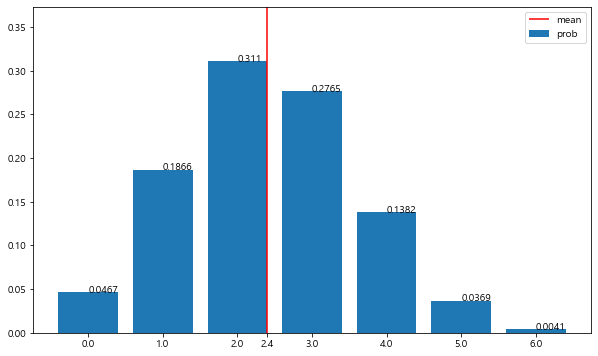

In [105]:
from scipy.special import comb

# Ïù¥Ìï≠Î∂ÑÌè¨ Ìï®Ïàò
def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f


# Í∏∞ÎåÄÍ∞í Ìï®Ïàò
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])


# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #Í∏∞ÎåÄÍ∞í:ÌèâÍ∑†
    ax.set_xticks(np.append(x_set, E(X)))   #xÏ∂ïÏùò Í∞í Ï∂úÎ†•
    ax.set_ylim(0, prob.max()*1.2)          #yÏ∂ïÏùò ÌïúÍ≥Ñ ÏßÄÏ†ï
    ax.legend()
    for x, y in zip(x_set, prob):
        ax.text(x, y, round(y,4))
    
    plt.show() 
    
    
n, p, x = 6, 0.4, 3

# Ïù¥Ìï≠Î∂ÑÌè¨ Ìï®Ïàò
X = Bin(n,p)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_prob(X)

### [Ïã§Ïäµ] ÏòàÏ†ú 7-2
4ÏßÄÏÑ†Îã§ÌòïÏúºÎ°ú Ï£ºÏñ¥ÏßÑ 5Î¨∏Ï†úÏóêÏÑú ÏûÑÏùòÎ°ú ÎãµÏùÑ ÏÑ†ÌÉùÌï† Îïå, Ï†ïÎãµÏùÑ ÏÑ†ÌÉùÌïú Î¨∏Ï†ú ÏàòÎ•º ÌôïÎ•†Î≥ÄÏàò XÎùº Ìï†Îïå, XÏùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÄ?

In [35]:
n = 5    # nÏùò Í∞úÏàòÎ•º ÌÅ¨Í≤å Ìï¥Î≥¥Í∏∞ --> Í∑∏ÎûòÌîÑÍ∞Ä Ï¢ÖÎ™®ÏñëÏúºÎ°ú Î≥ÄÍ≤ΩÎê®
p = 0.25   # 0.3, 0.5, 0.7 Î≥ÄÍ≤ΩÌï¥Î≥¥Í∏∞
X = Bin(n,p)
X

(array([0, 1, 2, 3, 4, 5]), <function __main__.Bin.<locals>.f(x)>)

In [36]:
# Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 1.25
Î∂ÑÏÇ∞   V(X): 0.9375


In [37]:
# Ïù¥Ìï≠Î∂ÑÌè¨ Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
def E_binom(n, p):
    return n*p

def V_binom(n, p):
    return n*p*(1-p)
    
    
print(f'Í∏∞ÎåÄÍ∞í E(X): {E_binom(n, p):.4}')
print(f'Î∂ÑÏÇ∞   V(X): {V_binom(n, p):.4}')


Í∏∞ÎåÄÍ∞í E(X): 1.25
Î∂ÑÏÇ∞   V(X): 0.9375


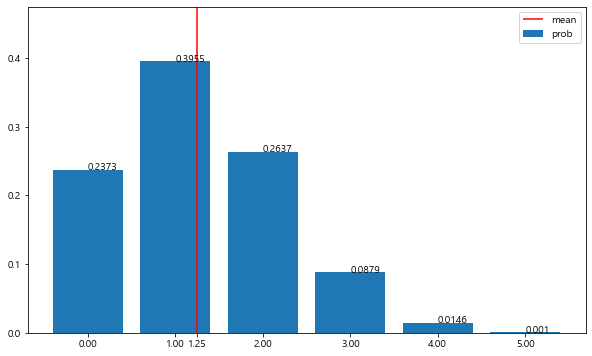

In [38]:
# Í∑∏ÎûòÌîÑ
plot_prob(X)

### [Ïã§Ïäµ] Ïù¥Ìï≠Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
ÌëúÎ≥∏Ïù¥ 10,  ÌôïÎ•†Ïù¥ 0.3, 0.5, 0.7 Ïù∏ Í∑∏ÎûòÌîÑÎ•º ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÏóê Í∑∏Î¶¨ÏãúÏò§

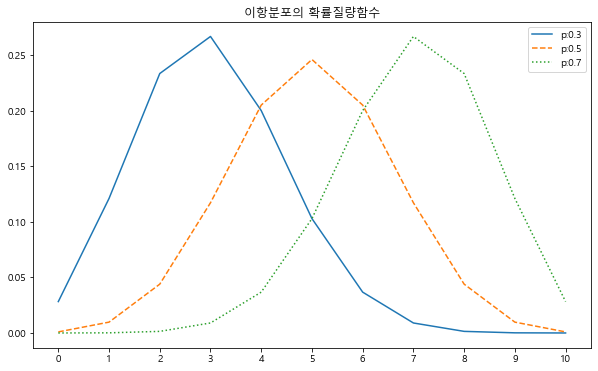

In [39]:
fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(111) # (1,1,1)
linestyles = ['-','--',':']

n = 10
p = [0.3,0.5,0.7]
x = np.arange(n+1)

for p, ls in zip(p, linestyles):
    rv = sp.stats.binom(n, p)
    ax.plot(x, rv.pmf(x), label=f'p:{p}', linestyle=ls)

ax.set_xticks(x)
ax.legend()
plt.title('Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')    
plt.show()

### 3.Í∏∞ÌïòÎ∂ÑÌè¨(geometric distributuin)
Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏóêÏÑú Ï≤òÏùå ÏÑ±Í≥µÌï† ÎïåÍπåÏßÄ Î∞òÎ≥µÌïú ÏãúÌñâ ÌöüÏàòÍ∞Ä Îî∞Î•¥Îäî Î∂ÑÌè¨

- $X \sim Ge(p) : (1-p)^{x-1}p$
- $E(X)={1 \over p}$ 
- $V(X)={(1-p) \over p^2} $

In [40]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

p = 0.5
X = Ge(p)

Í∏∞ÎåÄÍ∞í E(X): 2.0
Î∂ÑÏÇ∞   V(X): 2.0


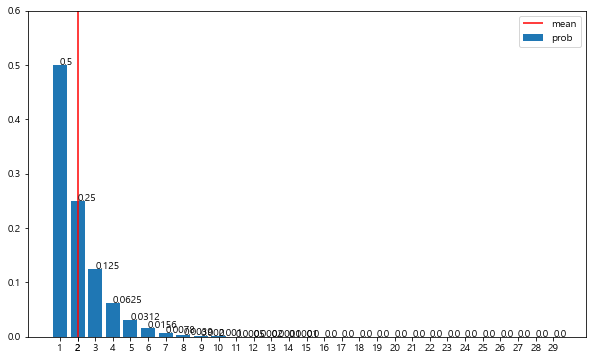

In [41]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

#Í∑∏ÎûòÌîÑ
plot_prob(X)

#### * scipy.statsÏóê ÏûàÎäî Í∏∞ÌïòÎ∂ÑÌè¨Ïùò (geom)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

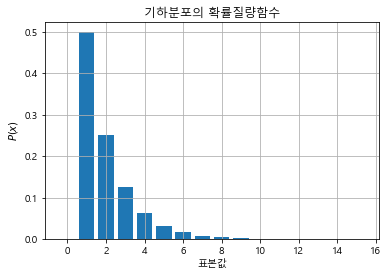

In [42]:
n, p = 15, 0.5
rv = sp.stats.geom(p)

xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')
plt.title('Í∏∞ÌïòÎ∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')
plt.grid()
plt.show()

#### Í∏∞ÌïòÎ∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

[2 2 2 2 1 2 1 4 5 1 3 2 2 4 1 1 1 3 3 3 6 3 1 3 1 2 1 5 2 1 1 3 1 2 1 2 2
 2 5 2 1 1 2 1 2 2 1 1 1 1 2 1 7 1 1 1 2 1 1 1 1 1 2 1 1 1 3 1 3 1 6 1 6 2
 2 1 1 1 1 1 1 1 1 2 2 1 2 1 2 4 1 2 1 2 1 1 2 1 3 1]


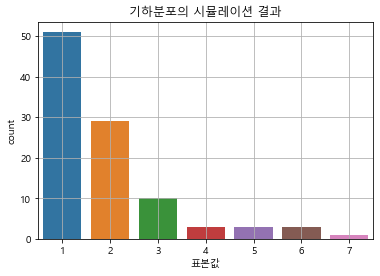

In [43]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x)
plt.title('Í∏∞ÌïòÎ∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.grid()
plt.show()

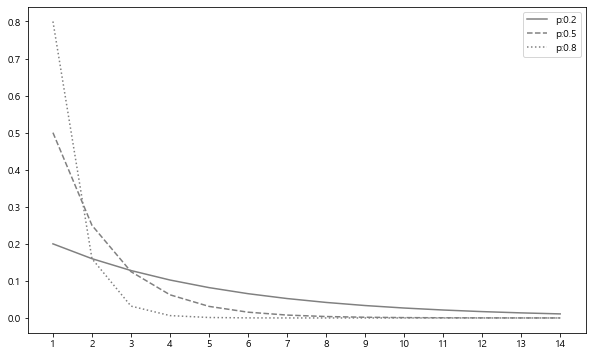

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = sp.stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 4.Ìè¨ÌïòÏÜ° Î∂ÑÌè¨(poisson distributuin)
Îã®ÏúÑ ÏãúÍ∞Ñ ÏïàÏóê Ïñ¥Îñ§ ÏÇ¨Í±¥Ïù¥ Î™á Î≤à ÏùºÏñ¥ÎÇ† Í≤ÉÏù∏ÏßÄÎ•º ÌëúÌòÑÌïòÎäî Ïù¥ÏÇ∞ ÌôïÎ•† Î∂ÑÌè¨

In [45]:
from scipy.special import factorial
import numpy as np

def Poi(lamda):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return (np.power(lamda, x) * np.exp(-lamda)) / factorial(x) 
        else:
            return 0
    return x_set, f

lamda = 3
X = Poi(lamda)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

Í∏∞ÎåÄÍ∞í E(X): 3.0
Î∂ÑÏÇ∞   V(X): 3.0


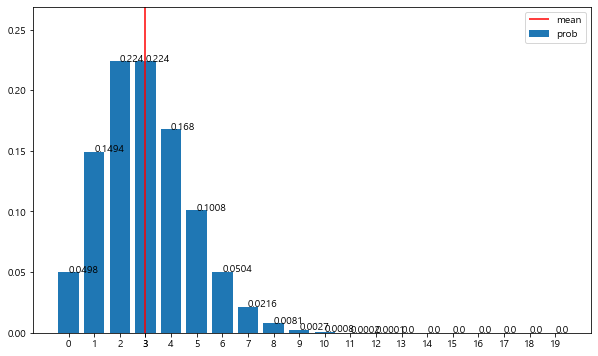

In [46]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

#Í∑∏ÎûòÌîÑ
plot_prob(X)

#### * scipy.statsÏóê ÏûàÎäî Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨Ïùò (poisson)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

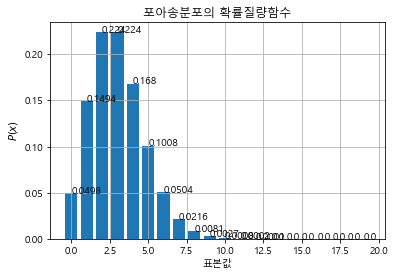

In [47]:
lamda = 3
rv = sp.stats.poisson(lamda)

xx = np.arange(20)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')
plt.title('Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')
plt.grid()
for x, y in zip(xx, rv.pmf(xx)):
    plt.text(x, y, round(y,4))
plt.show()

#### *Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

[5 6 2 0 7 3 3 1 6 1 3 3 2 2 2 2 3 3 3 1 1 2 4 4 2 1 1 4 3 6 8 1 3 2 5 6 5
 4 1 6 2 1 1 4 0 3 5 2 4 1 3 0 1 4 2 4 4 5 2 2 4 2 2 2 4 4 1 5 5 8 3 3 3 6
 1 1 1 0 2 2 4 1 2 4 1 4 3 1 2 4 4 2 3 7 3 7 5 1 2 3]


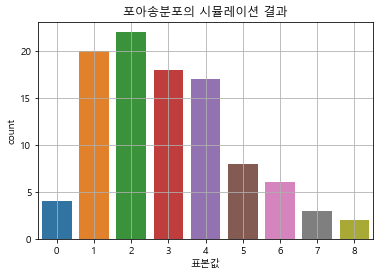

In [48]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x)
plt.title('Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.grid()
plt.show()

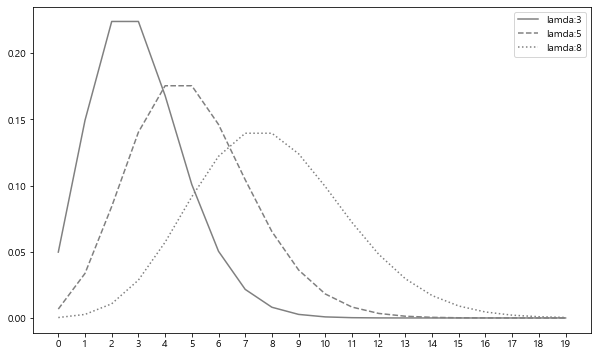

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lamda, ls in zip([3, 5, 8], linestyles):
    rv = sp.stats.poisson(lamda)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lamda:{lamda}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

### 5.Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨(Categorical Distribution)
- Ïπ¥ÌÖåÍ≥†Î¶¨ ÏãúÌñâ(Categorical trial) ÏùÄ¬†kÍ∞úÏùò¬†Ïπ¥ÌÖåÍ≥†Î¶¨ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÎäî Ïã§ÌóòÏóêÏÑú Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏÑ†ÌÉùÎê† ÌôïÎ•†Ïù¥¬†Œº=(Œº1,‚ãØ, Œºk)Ïùº Îïå ÌôïÎ•†Î≥ÄÏàò¬†XÎäî Î™®ÏàòÍ∞Ä¬† Œº Ïù¥Í≥† Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä¬†kÍ∞úÏù∏¬†Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨(Categorical distribution)Î•º Îî∞Î•∏Îã§
- 1~KÍπåÏßÄ kÍ∞ú Ï†ïÏàòÍ∞í Ï§ë ÌïòÎÇòÏùò ÌôïÎ•†Î≥ÄÏàòÎ•º Í∞ñÎäî Î∂ÑÌè¨
<br>
- Ïù¥ÏßÑÎ∂ÑÎ•ò : Î≤†Î•¥ÎàÑÏù¥Î∂ÑÌè¨(1Î≤à ÏãúÌñâ)-->Ïù¥Ìï≠Î∂ÑÌè¨(NÎ≤à ÏãúÌñâ)
- Îã§Ï§ëÎ∂ÑÎ•ò : Ïπ¥ÌÖåÍ≥†Î¶¨Î∂ÑÌè¨(1Î≤à ÏãúÌñâ)-->Îã§Ìï≠Î∂ÑÌè¨(NÎ≤à ÏãúÌñâ)
> - ex: ÎèôÏ†ÑÏùÑ NÎ≤à ÎçòÏ†∏ ÏïûÎ©¥Ïù¥ ÎÇòÏò§Îäî ÌöüÏàòÏùò Î∂ÑÌè¨(Ïù¥Ìï≠Î∂ÑÌè¨)
> - ex: Ï£ºÏÇ¨ÏúÑÎ•º NÎ≤à ÎçòÏ†∏ Í∞Å Î©¥Ïù¥ ÎÇòÏò§Îäî ÌöüÏàò ÏßëÌï©Ïùò Î∂ÑÌè¨(Îã§Ìï≠Î∂ÑÌè¨)

- $X \sim Cat(x; \mu)$
- $E(X_{k})=\mu_{k}=p_{k}$
- $V(X_{k})=\mu_{k}(1-\mu_{k})=p_{k}(1-p_{k})$

#### * scipy.statsÏóê ÏûàÎäî Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨Ïùò (multinomial)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

xx[1 2 3 4 5 6]Ïùò one-hot-encoding:
   1  2  3  4  5  6
0  1  0  0  0  0  0
1  0  1  0  0  0  0
2  0  0  1  0  0  0
3  0  0  0  1  0  0
4  0  0  0  0  1  0
5  0  0  0  0  0  1


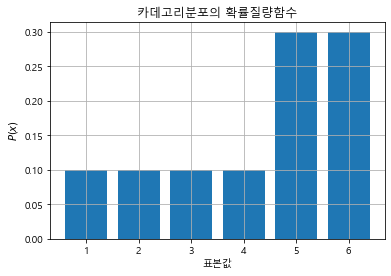

In [50]:
import scipy as sp
import numpy as np
import pandas as pd

mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu) # Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx) # one-hot-encoding
print(f'xx{xx}Ïùò one-hot-encoding:\n{xx_ohe}')

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')
plt.title('Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨Ïùò ÌôïÎ•†ÏßàÎüâÌï®Ïàò')
plt.grid()
plt.show()

#### *Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàòÏùò ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

[[0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]
[0.1  0.15 0.13 0.07 0.33 0.22]


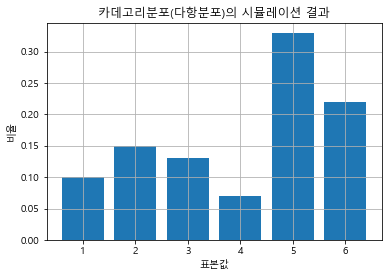

In [51]:
np.random.seed(1)
X = rv.rvs(100)
Y = X.sum(axis=0) / float(len(x))
print(X[:6])
print(Y[:6])

plt.bar(np.arange(1,7), Y)
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('ÎπÑÏú®')
plt.title('Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨(Îã§Ìï≠Î∂ÑÌè¨)Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º')
plt.grid()
plt.show()

#### * Ïù¥Î°†Ï†ÅÏù∏ ÌôïÎ•†Î∂ÑÌè¨(rv.pmfÏÇ¨Ïö©)ÏôÄ ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º(rv.rvsÏÇ¨Ïö©)Î•º ÎπÑÍµêÌïòÎ©¥

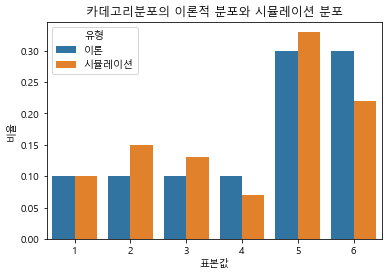

In [52]:
df = pd.DataFrame({'Ïù¥Î°†': rv.pmf(xx_ohe.values),'ÏãúÎÆ¨Î†àÏù¥ÏÖò': Y}, 
                  index=np.arange(1,7)).stack()
df = df.reset_index()
df.columns=['ÌëúÎ≥∏Í∞í','Ïú†Ìòï','ÎπÑÏú®']
df.pivot('ÌëúÎ≥∏Í∞í', 'Ïú†Ìòï', 'ÎπÑÏú®')
df

sns.barplot(data=df, x='ÌëúÎ≥∏Í∞í', y='ÎπÑÏú®', hue='Ïú†Ìòï')
plt.title('Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨Ïùò Ïù¥Î°†Ï†Å Î∂ÑÌè¨ÏôÄ ÏãúÎÆ¨Î†àÏù¥ÏÖò Î∂ÑÌè¨')
plt.show()

#### * Ïòà: k=3 Ïπ¥Îç∞Í≥†Î¶¨Î∂ÑÌè¨(Î∂ìÍΩÉÎç∞Ïù¥ÌÑ∞) 

In [53]:
# ÏïÑÎûò ÏòàÏ†úÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞ ÎùºÏù¥Î∏åÎü¨Î¶¨(Î®∏Ïã†Îü¨ÎãùÏö©)Í∞Ä ÏÑ§ÏπòÎêòÏñ¥Ïïº Ïã§ÌñâÎêúÎã§.
!pip install scikit-learn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


df1.ÌíàÏ¢Ö: [0, 1, 2]
Categories (3, int64): [0, 1, 2]
df2.ÌíàÏ¢Ö: [0]
Categories (3, int64): [0, 1, 2]


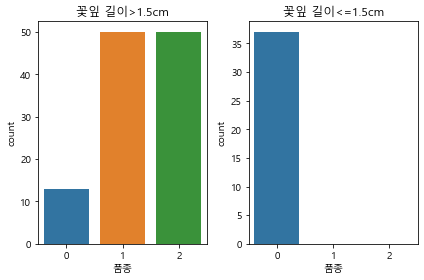

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['ÌíàÏ¢Ö'] = pd.Series(iris.target, dtype='category')

df1 = df[ df['petal length (cm)'] > 1.5]  # ÍΩÉÏûé Í∏∏Ïù¥>1.5cm
df2 = df[ df['petal length (cm)'] <= 1.5] # ÍΩÉÏûé Í∏∏Ïù¥<=1.5cm
print(f'df1.ÌíàÏ¢Ö: {df1.ÌíàÏ¢Ö.unique()}')
print(f'df2.ÌíàÏ¢Ö: {df2.ÌíàÏ¢Ö.unique()}')

fig, ax = plt.subplots(1, 2)
sns.countplot(data=df1, x='ÌíàÏ¢Ö', ax=ax[0]).set_title('ÍΩÉÏûé Í∏∏Ïù¥>1.5cm')
sns.countplot(data=df2, x='ÌíàÏ¢Ö', ax=ax[1]).set_title('ÍΩÉÏûé Í∏∏Ïù¥<=1.5cm')
plt.tight_layout()
plt.show()

### 6.Îã§Ìï≠Î∂ÑÌè¨(Multinominal Distribution)

ÏÑ±Í≥µÌôïÎ•†Ïù¥ Œº=(Œº1,‚ãØ, Œºk)Ïù∏ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏãúÌñâÏùÑ nÎ≤à Î∞òÎ≥µÌñàÏùÑ ÎïåÏùò Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÑ±Í≥µÌöüÏàòÎäî Îã§Ìï≠Î∂ÑÌè¨(Multinomial distribution)ÏùÑ Îî∞Î•¥Í≤å ÎêúÎã§.

- Îã§Ï§ëÎ∂ÑÎ•ò : Ïπ¥ÌÖåÍ≥†Î¶¨Î∂ÑÌè¨(1Î≤àÏãúÌñâ)-->Îã§Ìï≠Î∂ÑÌè¨(Ïó¨Îü¨ Î≤à ÏãúÌñâ)
<br><br>
- $X \sim Cat(x;N, \mu)$ = $X \sim Mu(x;N, \mu) $  #Ïπ¥ÌÖåÍ≥†Î¶¨k,ÌëúÎ≥∏Í∞ØÏàòN
- $E(X_{k})=N\mu_{k}=Np_{k}$
- $V(X_{k})=N\mu_{k}(1-\mu_{k})=Np_{k}(1-p_{k})$

[[ 4  0  4  4  9  9]
 [ 2  2  4  2  7 13]
 [ 4  6  0  3 10  7]
 [ 3  4  2  5  9  7]
 [ 3  1  3  4  9 10]
 [ 3  3  3  4  9  8]]


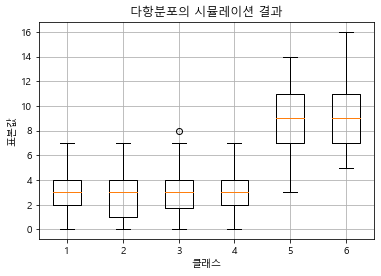

In [56]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu) # Îã§Ìï≠Î∂ÑÌè¨

np.random.seed(10)
X = rv.rvs(100)
print(X[:6])  # 6Í∞úÎßå Î≥¥Ïó¨Ï£ºÍ∏∞

plt.boxplot(X)
plt.xlabel('ÌÅ¥ÎûòÏä§')
plt.ylabel('ÌëúÎ≥∏Í∞í')
plt.title('Îã§Ìï≠Î∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º')
plt.grid()
plt.show()

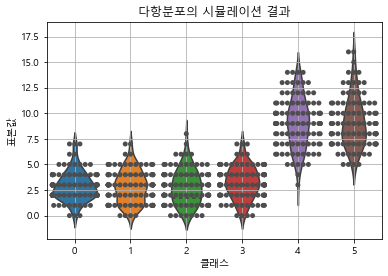

In [251]:
# SeabornÏùò violinplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["ÏãúÎèÑ", "ÌÅ¥ÎûòÏä§", "ÌëúÎ≥∏Í∞í"]

sns.violinplot(data=df, x="ÌÅ¥ÎûòÏä§", y="ÌëúÎ≥∏Í∞í", inner="quartile")
sns.swarmplot(data=df, x="ÌÅ¥ÎûòÏä§", y="ÌëúÎ≥∏Í∞í", color=".3")
plt.title("Îã§Ìï≠Î∂ÑÌè¨Ïùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º")
plt.grid()
plt.show()

------------------------------

-------

## 2.Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨

### Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàòÏóêÏÑú Îã§Î£¨ ÎÇ¥Ïö©(Ìï®Ïàò)


- $f(x) = {1 \over 8}x,   (0 \le x \le4)$

In [57]:
# Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàò ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò Íµ¨ÌòÑÌïòÍ∏∞

# ÏÉÅÌÉúÍµ¨Í∞Ñ
x_range = np.array([0,4]) # 0~4Ïùò Íµ¨Í∞ÑÏùº Í≤ΩÏö∞
x_range


# ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

    
# ÌôïÎ•†Î≥ÄÏàò
X = [x_range, f]

- ÌôïÎ•†(Î©¥Ï†Å) Íµ¨ÌïòÍ∏∞

In [58]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:ÌîºÏ†ÅÎ∂ÑÌï®Ïàò, 2,3: Ï†ÅÎ∂ÑÎ≤îÏúÑ   
#Í≤∞Í≥ºÍ∞í: (0.3125, 3.469446951953614e-15)=(Ï†ÅÎ∂ÑÍ∞í, Ï∂îÏ†ïÏò§Ï∞®)

(0.312, 0.000)

### Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨ Í¥ÄÎ†® Ìï®ÏàòÎì§

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# Í∏∞ÎåÄÍ∞í:ÌèâÍ∑†
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


# Î∂ÑÏÇ∞
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'Í∏∞ÎåÄÍ∞í E(X): {E(X):.4}')
    print(f'Î∂ÑÏÇ∞   V(X): {V(X):.4}')
    print(f'ÌëúÏ§ÄÌé∏Ï∞®STD(X): {V(X)**(1/2):.4}') 
    

# ÌôïÎ•†
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'ÌôïÎ•†: {prob_sum[0]}')
    

# Í∑∏ÎûòÌîÑ(Íµ¨Í∞Ñ ÏÉâÏπ†ÌïòÍ∏∞)
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show() 


- [Î¨∏Ï†ú] $P(2 < X \le 3)$ ÌôïÎ•†ÏùÄ?

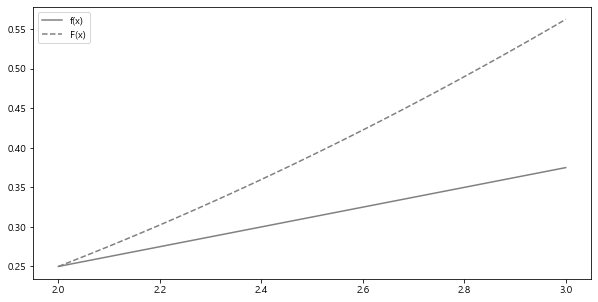

In [60]:
plot_prob(X, 2, 3)

### Ï†ïÍ∑úÎ∂ÑÌè¨ 
- ÏûêÏó∞ÌòÑÏÉÅÏù¥ÎÇò ÏÇ¨ÌöåÌòÑÏÉÅÏóêÏÑú ÏñªÍ≤å ÎêòÎäî ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÎ£åÏóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÄ ÏûêÎ£åÏùò ÏàòÍ∞Ä ÌÅ¥ÏàòÎ°ù Í≥ÑÍ∏âÍ∞ÑÍ≤©Ïù¥ Ï¢ÅÏïÑÏßÄÍ≥†, Í∑∏Î¶ºÍ≥º Í∞ôÏù¥ Ï¢åÏö∞ ÎåÄÏπ≠Ïù∏ Ï¢Ö Î™®Ïñë Ïùò Í≥°ÏÑ†Ïóê Í∞ÄÍπåÏõåÏßÑÎã§. 
- NÍ∞úÏùò ÏûÑÏùòÏùò Î∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ ÏñªÏùÄ ÌëúÎ≥∏Ïùò ÌèâÍ∑†ÏùÄ NÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Í∏∞ÎåìÍ∞íÏù¥ Œº, Î∂ÑÏÇ∞Ïù¥ œÉ2Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú ÏàòÎ†¥ÌïúÎã§-->Ï§ëÏã¨Í∑πÌïúÏùòÏ†ïÎ¶¨(Ïó¨Îü¨ ÌôïÎ•†Î≥ÄÏàòÏùò Ìï©Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑Ìïú Î∂ÑÌè¨Î•º Ïù¥Î£®Îäî ÌòÑÏÉÅÏùÑ ÎßêÌïúÎã§)

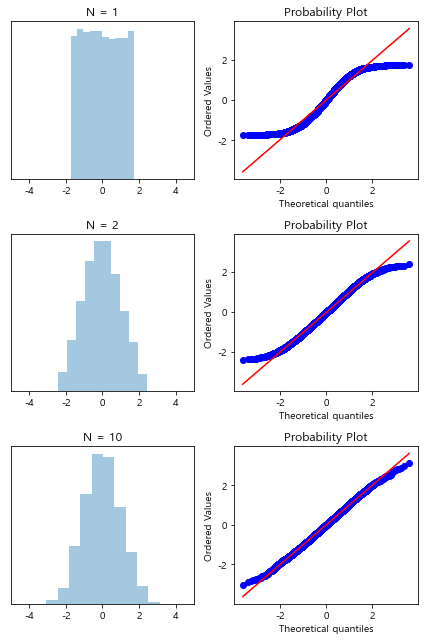

In [388]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title(f"N = {N}")
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt) #QQ-plot: Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ ÌôïÏù∏

plt.tight_layout()
plt.show()

- Ïù¥Ìï≠Î∂ÑÌè¨ B(n, p)ÏóêÏÑú pÍ∞Ä ÏùºÏ†ïÌïòÍ≥† nÏù¥ Ïª§ÏßÄÎ©¥ Ïù¥Ìï≠Î∂ÑÌè¨Ïùò Í∑∏ÎûòÌîÑÎäî Í∑∏Î¶ºÍ≥º Í∞ôÏù¥ Ï¢Ö Î™®ÏñëÏóê Í∞ÄÍπåÏõåÏßÑÎã§.


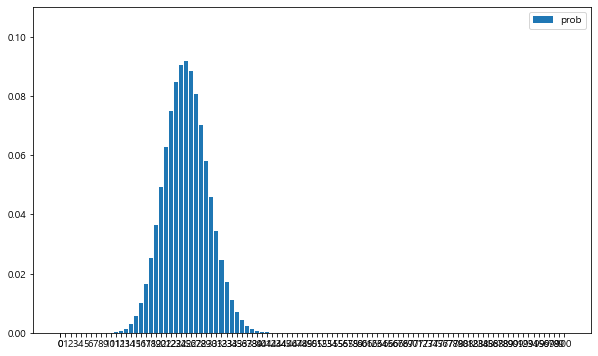

In [61]:
def plot_prob_bi(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.set_xticks(np.append(x_set, E(X)))   #xÏ∂ïÏùò Í∞í Ï∂úÎ†•
    ax.set_ylim(0, prob.max()*1.2)          #yÏ∂ïÏùò ÌïúÍ≥Ñ ÏßÄÏ†ï
    ax.legend()
   
    plt.show()

n = 100    # nÏùò Í∞úÏàòÎ•º ÌÅ¨Í≤å Ìï¥Î≥¥Í∏∞ --> Í∑∏ÎûòÌîÑÍ∞Ä Ï¢ÖÎ™®ÏñëÏúºÎ°ú Î≥ÄÍ≤ΩÎê®
p = 0.25   # 0.3, 0.5, 0.7 Î≥ÄÍ≤ΩÌï¥Î≥¥Í∏∞
X = Bin(n,p)
plot_prob_bi(X)

### 1. Ï†ïÍ∑úÎ∂ÑÌè¨

In [62]:
#ùëç ~ N(0,1) Ï†ïÍ∑úÌôîÎ•º Îî∞Î•∏ Ï†ïÍ∑úÎ∂ÑÌè¨
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

Í∏∞ÎåÄÍ∞í E(X): 2.0
Î∂ÑÏÇ∞   V(X): 0.25
ÌëúÏ§ÄÌé∏Ï∞®STD(X): 0.5


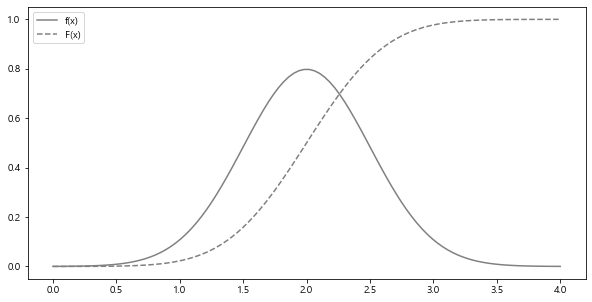

In [63]:
#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)
X
check_prob(X)
plot_prob(X, 0, 4)

### [Ïã§Ïäµ] Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú ÌôïÎ•† Íµ¨ÌïòÍ∏∞
ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉù ÌÇ§Ïùò ÌèâÍ∑†Ïù¥ 170cmÏù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 5cmÎùºÎ©¥, Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Îäî N(170, 5^2)Î•º Îî∞Î•∏ Îã§Í≥† Ìï† Ïàò ÏûàÎã§. Ïù¥ ÏÇ¨Ïã§ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Í∞Ä 165cmÏù¥ÏÉÅ 175cm Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ?

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

#ùëç ~ N(0,1) Ï†ïÍ∑úÌôîÎ•º Îî∞Î•∏ Ï†ïÍ∑úÎ∂ÑÌè¨
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

# ÌôïÎ•†
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'ÌôïÎ•†: {prob_sum[0]}')
    

mu, sigma = 170, 5
X = N(mu, sigma)

# ÌôïÎ•†
a, b = 165, 175
get_prob(X, a, b)


ÌôïÎ•†: 0.6827


### [Ïã§Ïäµ] Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú ÌôïÎ•† Íµ¨ÌïòÍ∏∞
Î™®ÏùòÍ≥†ÏÇ¨ ÌèâÍ∑† Ï†êÏàòÍ∞Ä 70Ï†êÏù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 8Ï†êÏù¥ÎùºÎ©¥, Ïö∞Ïó∞Ìûà ÎßåÎÇú ÌïôÏÉùÏùò Ï†êÏàòÎäî N(70, 8^2)ÏùÑ Îî∞Î•∏Îã§Í≥† Ìï† Ïàò ÏûàÎã§. Ïù¥ ÏÇ¨Ïã§ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïö∞Ïó∞Ìûà ÎßåÎÇú ÌïôÏÉùÏùò Ï†êÏàòÍ∞Ä 54Ï†ê Ïù¥ÏÉÅ 86Ï†ê Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ?

In [114]:
mu, sigma = 70, 8
X = N(mu, sigma)

a, b = 54, 86
get_prob(X, a, b)


ÌôïÎ•†: 0.9545


### scipy Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨ ÌÅ¥ÎûòÏä§ Ï¢ÖÎ•ò 
- Ïó∞ÏÜç : uniform (Í∑†ÏùºÎ∂ÑÌè¨)
- Ïó∞ÏÜç : norm (Ï†ïÍ∑úÎ∂ÑÌè¨)
- Ïó∞ÏÜç : beta (Î≤†ÌÉÄÎ∂ÑÌè¨)
- Ïó∞ÏÜç : gamma (Í∞êÎßàÎ∂ÑÌè¨)
- Ïó∞ÏÜç : t (Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨)
- Ïó∞ÏÜç : f (FÎ∂ÑÌè¨)
- Ïó∞ÏÜç : chi2 (Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨)
- Ïó∞ÏÜç : dirichlet (ÎîîÎ¶¨ÌÅ¥Î¶¨Î∂ÑÌè¨)    
- Ïó∞ÏÜç : multivariate_normal (Îã§Î≥ÄÏàò Ï†ïÍ∑úÎ∂ÑÌè¨)

#### * Ï†ïÍ∑úÎ∂ÑÌè¨(scipy.stats.norm)

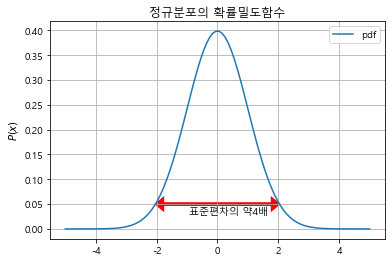

In [115]:
import scipy as sp

mu, std = 0, 1
rv = sp.stats.norm(mu, std) #  ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx), label='pdf')
# plt.plot(xx, rv.cdf(xx), label='cdf')
plt.arrow(0, 0.05, 2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, 'ÌëúÏ§ÄÌé∏Ï∞®Ïùò ÏïΩ4Î∞∞')
plt.ylabel('$P(x)$')
plt.title('Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò')
plt.legend()
plt.grid()
plt.show()

#### * Ï†ïÍ∑úÎ∂ÑÌè¨ ÌëúÎ≥∏Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±

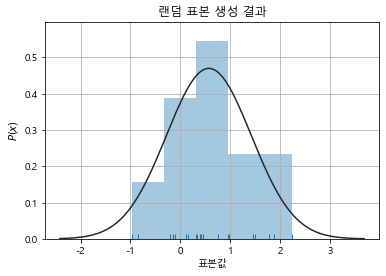

In [116]:
np.random.seed(0)
x = rv.rvs(20)
# print(x)

sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title('ÎûúÎç§ ÌëúÎ≥∏ ÏÉùÏÑ± Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')
plt.grid()
plt.show()

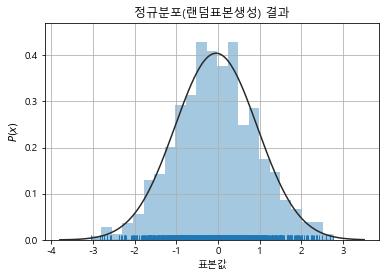

In [68]:
# ÎûúÎç§ÌëúÎ≥∏ ÏÉùÏÑ±ÌïòÏó¨  Ï†ïÍ∑úÎ∂ÑÌè¨ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
np.random.seed(0)
X = rv.rvs(1000)
# Y = sp.stats.norm.pdf(X, loc=MEAN, scale=STD)
Y = rv.pdf(X)

sns.distplot(X, rug=True, kde=False, fit=sp.stats.norm)
plt.title('Ï†ïÍ∑úÎ∂ÑÌè¨(ÎûúÎç§ÌëúÎ≥∏ÏÉùÏÑ±) Í≤∞Í≥º')
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(x)$')

plt.hlines(0, min(X), max(X), alpha=0.3)
plt.fill_between(X, Y, where=(X>=165) & (X<=170), color='red', alpha=0.5)

plt.grid()
plt.show()



### [Ïã§Ïäµ] scipy.statsÏóê ÏûàÎäî normÌï®Ïàò ÏÇ¨Ïö©ÌïòÏó¨ ÌôïÎ•†Íµ¨ÌïòÍ∏∞
ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉù ÌÇ§Ïùò ÌèâÍ∑†Ïù¥ 170cmÏù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 5cmÎùºÎ©¥, Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Îäî N(170, 5^2)Î•º Îî∞Î•∏ Îã§Í≥† Ìï† Ïàò ÏûàÎã§. Ïù¥ ÏÇ¨Ïã§ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Í∞Ä 165cmÏù¥ÏÉÅ 175cm Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ?

In [117]:
import scipy as sp

MEAN, STD = 170, 5 #ÌèâÍ∑†:170, ÌëúÏ§ÄÌé∏Ï∞®:5
x1, x2 = 165, 175
rv = sp.stats.norm(loc=MEAN, scale=STD)  

# ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®ÏàòÏóê ÏùòÌï¥ Íµ¨Í∞Ñ ÌôïÎ•† Í≥ÑÏÇ∞
print(f'P({x1}<=X<={x2})= {rv.cdf(x2) - rv.cdf(x1)}')

P(165<=X<=175)= 0.6826894921370859


### Ï†ïÍ∑úÎ∂ÑÌè¨ Í∑∏ÎûòÌîÑ ÏòàÏ†ú  

#### * Ï†ïÍ∑úÎ∂ÑÌè¨ Í∑∏ÎûòÌîÑ ÏòàÏ†ú(Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞)
Î∂ìÍΩÉ Ï§ë ÌäπÏ†ïÌïú Ï¢Ö(setosa)Ïùò ÍΩÉÏûé Í∏∏Ïù¥(petal length (cm))Ïóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû®--> Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑

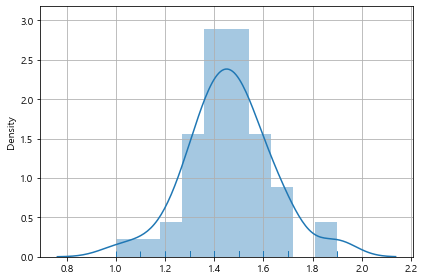

In [70]:
from sklearn.datasets import load_iris

data = load_iris()
setosa_sepal_length = data['data'][:50, 2]  # petal length (cm)
setosa_sepal_length

sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.grid()
plt.show()

#### * Ï†ïÍ∑úÎ∂ÑÌè¨ Í∑∏ÎûòÌîÑ ÏòàÏ†ú(ÎØ∏Íµ≠ ÎÇòÏä§Îã• ÏàòÏùµÏú®)
- pandas_datareader ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò DataReader Ìï®ÏàòÎäî Ïõπ ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Î•º DataFrame Í∞ùÏ≤¥Î°ú ÎßåÎìúÎäî Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌï®


#### ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§ÏπòÌïòÍ∏∞

In [ ]:
!pip install pandas_datareader

In [72]:
import pandas_datareader as pdr

# help(pdr)

Í≥ºÍ±∞ 10ÎÖÑÍ∞ÑÏùò ÎØ∏Íµ≠ ÎÇòÏä§Îã• Ï£ºÍ∞ÄÏßÄÏàò

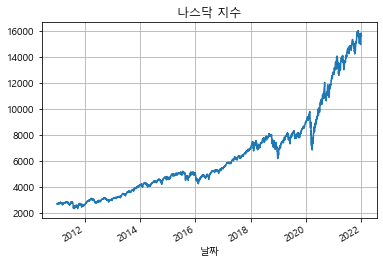

In [73]:
import pandas as pd
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
data = pd.DataFrame()

data[symbol] = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2021-12-31')[symbol]

data = data.dropna()
data
data.plot(legend=False)
plt.xlabel('ÎÇ†Ïßú')
plt.title('ÎÇòÏä§Îã• ÏßÄÏàò')
plt.grid()
plt.show()

In [74]:
import pandas_datareader as pdr

symbol = 'NASDAQCOM'
df = pdr.DataReader(symbol, data_source='fred',
                            start='2011-01-01', end='2021-12-31')
data = df.copy()
data = data.dropna()
data.head()

NASDAQCOM
DATE                 
2011-01-03    2691.52
2011-01-04    2681.25
2011-01-05    2702.20
2011-01-06    2709.89
2011-01-07    2703.17

In [75]:
# ÏùºÍ∞Ñ ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±
daily_returns = data.pct_change().dropna()  # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'ÌèâÍ∑† ÏùºÍ∞ÑÏàòÏùµÎ•† : {mean*100:>3.2f}%')
print(f'ÌèâÍ∑† ÏùºÍ∞ÑÎ≥ÄÎèôÏÑ± : {std*100:>3.2f}%')

ÌèâÍ∑† ÏùºÍ∞ÑÏàòÏùµÎ•† : 0.07%
ÌèâÍ∑† ÏùºÍ∞ÑÎ≥ÄÎèôÏÑ± : 1.22%


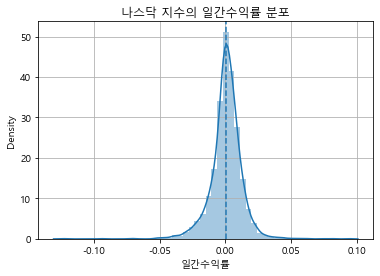

In [269]:
# ÏùºÍ∞Ñ ÏàòÏùµÎ•† Î∂ÑÌè¨Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# - KDE(Kernel Density Estimator):  Ïª§ÎÑê Î∞ÄÎèÑ Ï∂îÏ†ï
#      Î∂ÑÌè¨Î•º Î∂ÄÎìúÎüΩÍ≤å Í≥°ÏÑ†ÌôîÏãúÏºú Ï£ºÎäî ÏòµÏÖò
sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('ÎÇòÏä§Îã• ÏßÄÏàòÏùò ÏùºÍ∞ÑÏàòÏùµÎ•† Î∂ÑÌè¨')
plt.xlabel('ÏùºÍ∞ÑÏàòÏùµÎ•†')
plt.grid()
plt.show()

### [Ïã§Ïäµ] pandas_datareader : Íµ≠ÎÇ¥ ÌäπÏ†ï Ï£ºÍ∞Ä(ÏÇºÏÑ±Ï†ÑÏûê) Ï†ïÎ≥¥ Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞

ÌèâÍ∑† ÏùºÍ∞ÑÏàòÏùµÎ•† : 0.08%
ÌèâÍ∑† ÏùºÍ∞ÑÎ≥ÄÎèôÏÑ± : 2.63%


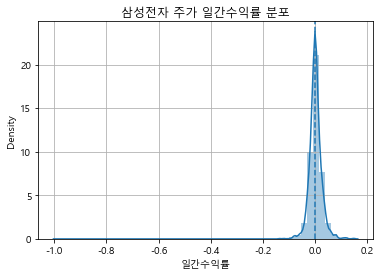

In [77]:
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
import pandas_datareader as pdr

symbol = '005930' # ÏÇºÏÑ±Ï†ÑÏûê: 
data = pd.DataFrame()

df = pdr.DataReader(symbol, data_source='naver',
                   start='1980-01-01', end='2022-05-26')
df
data = df.copy()
data = data.drop(columns=['Open','High','Low','Volume']) # Ïª¨ÎüºÏÇ≠Ï†ú
data = data.dropna()
data = data.astype({'Close':'int'}) # Ïª¨ÎüºÌÉÄÏûÖ Ï†ïÏàòÎ°ú Î≥ÄÌôò
data


# ÏùºÍ∞Ñ ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±
daily_returns = data.pct_change().dropna()  # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
daily_returns
mean= daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f'ÌèâÍ∑† ÏùºÍ∞ÑÏàòÏùµÎ•† : {mean*100:>3.2f}%')
print(f'ÌèâÍ∑† ÏùºÍ∞ÑÎ≥ÄÎèôÏÑ± : {std*100:>3.2f}%')

sns.distplot(daily_returns, kde=True)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls='--')
plt.ylim(0, ymax)
plt.title('ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä ÏùºÍ∞ÑÏàòÏùµÎ•† Î∂ÑÌè¨')
plt.xlabel('ÏùºÍ∞ÑÏàòÏùµÎ•†')
plt.grid()
plt.show()

---------

### [Ïã§Ïäµ] ÏòàÏ†ú 7-6 : Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê ÎåÄÌïú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Íµ¨ÌïòÍ∏∞

In [78]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob( N(1, 4**(1/2)) )  # N(1, np.sqrt(4))
check_prob( N(-1, 9**(1/2)) )
check_prob( N(2, 1**(1/2)) )
check_prob( N(8, 16**(1/2)) )

Í∏∞ÎåÄÍ∞í E(X): 1.0
Î∂ÑÏÇ∞   V(X): 4.0
ÌëúÏ§ÄÌé∏Ï∞®STD(X): 2.0
Í∏∞ÎåÄÍ∞í E(X): -1.0
Î∂ÑÏÇ∞   V(X): 9.0
ÌëúÏ§ÄÌé∏Ï∞®STD(X): 3.0
Í∏∞ÎåÄÍ∞í E(X): 2.0
Î∂ÑÏÇ∞   V(X): 1.0
ÌëúÏ§ÄÌé∏Ï∞®STD(X): 1.0
Í∏∞ÎåÄÍ∞í E(X): 8.0
Î∂ÑÏÇ∞   V(X): 16.0
ÌëúÏ§ÄÌé∏Ï∞®STD(X): 4.0


In [79]:
# rv.mean(), rv.var() rv.std()
import scipy as sp

rv = sp.stats.norm(loc=1, scale=4**(1/2))   # scale=np.sqrt(4)
print(f'ÌèâÍ∑†: {rv.mean()}, ÌëúÏ§ÄÌé∏Ï∞®: {rv.std()}')
rv = sp.stats.norm(loc=-1, scale=9**(1/2)) 
print(f'ÌèâÍ∑†: {rv.mean()}, ÌëúÏ§ÄÌé∏Ï∞®: {rv.std()}')
rv = sp.stats.norm(loc=2, scale=1**(1/2)) 
print(f'ÌèâÍ∑†: {rv.mean()}, ÌëúÏ§ÄÌé∏Ï∞®: {rv.std()}')
rv = sp.stats.norm(loc=8, scale=16**(1/2)) 
print(f'ÌèâÍ∑†: {rv.mean()}, ÌëúÏ§ÄÌé∏Ï∞®: {rv.std()}')

ÌèâÍ∑†: 1.0, ÌëúÏ§ÄÌé∏Ï∞®: 2.0
ÌèâÍ∑†: -1.0, ÌëúÏ§ÄÌé∏Ï∞®: 3.0
ÌèâÍ∑†: 2.0, ÌëúÏ§ÄÌé∏Ï∞®: 1.0
ÌèâÍ∑†: 8.0, ÌëúÏ§ÄÌé∏Ï∞®: 4.0


### [Ï∞∏Í≥†] ÌôïÎ•†Î∂ÑÌè¨ÏôÄ Íº¨Î¶¨ÌôïÎ•† ÌôïÏù∏

In [80]:
rv = sp.stats.norm(loc=0, scale=1)

In [81]:
#ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò : P(X=x) 
rv.pdf(2) 

0.054

In [82]:
#ÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò : P(X<=x) 
rv.cdf(1.7)

0.955

In [83]:
#ÏÉÅÏúÑ 100ùõº"%" Ï†ê:Zùõº Ïù∏ Íº¨Î¶¨ÌôïÎ•†: Î∞±Î∂ÑÏúÑÏàòÎ•º Za Î°ú ÌëúÏãú
rv.isf(0.3)   #ÏÉÅÏúÑ 30%Ïù∏ zÏ†ê

0.524

In [84]:
rv.isf(0.05)   #ÏÉÅÏúÑ 5%Ïù∏ zÏ†ê

1.645

In [85]:
#ÌôïÎ•†Ïù¥ aÍ∞Ä ÎêòÎäî Í∞ÄÏö¥Îç∞ Î∂ÄÎ∂ÑÏùò Íµ¨Í∞Ñ(Î©¥Ï†Å)
rv.interval(0.9)   # 90%Íµ¨Í∞Ñ

(-1.645, 1.645)

In [86]:
#Ïò§Î•∏Ï™ΩÍ≥º ÏôºÏ™Ω 5%Ïî© ÎÇ®Îäî Íµ¨Í∞ÑÍ≥º Í∞ôÎã§.
rv.isf(0.95), rv.isf(0.05)

(-1.645, 1.645)

In [87]:
rv.isf(0.9750)   

-1.960

### [Ïã§Ïäµ] ÏòàÏ†ú 7-7 : ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌôïÎ•† Í≥ÑÏÇ∞

In [89]:
import scipy as sp

rv = sp.stats.norm(loc=0, scale=1)

print(f'a.P(Z<=-1.45)   : {round(rv.cdf(-1.45), 4)}')
print(f'b.P(0<=Z<=2.58) : {round(rv.cdf(2.58) - 0.5, 4)}')
print(f'c.P(Z>=2.04)    : {round(1 -rv.cdf(2.04), 4)}')
print(f'd.P(-1.37<=Z<=0): {round(0.5 - rv.cdf(-1.37), 4)}')
print(f'e.P(|Z|<=1.69)  : {round((0.5-rv.cdf(-1.69))*2, 4)}')
print(f'f.P(|Z|>=2.79)  : {round(rv.cdf(-2.79)*2, 4)}')

a.P(Z<=-1.45)   : 0.0735
b.P(0<=Z<=2.58) : 0.4951
c.P(Z>=2.04)    : 0.0207
d.P(-1.37<=Z<=0): 0.4147
e.P(|Z|<=1.69)  : 0.909
f.P(|Z|>=2.79)  : 0.0053


#### * scipy norm Ìï®ÏàòÎ°ú ÌôïÎ•† Í≥ÑÏÇ∞
ÍµêÏû¨ ÏòàÏ†ú $X \sim N(30, 4^2)$Ïóê ÎåÄÌï¥ $P(27\le X \le 35)$Ïùò ÌôïÎ•†ÏùÄ?

In [90]:
import scipy as sp

rv = sp.stats.norm(loc=30, scale=16**(1/2))

print(f'P(27<=X<=35): {round(rv.cdf(35) - rv.cdf(27), 4)}')

P(27<=X<=35): 0.6677


### [Ïã§Ïäµ] ÏòàÏ†ú 7-9 : Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÎ•† Íµ¨ÌïòÍ∏∞

In [91]:
rv = sp.stats.norm(loc=75, scale=25**(1/2))

print(f'P(X<=64)    : {round(rv.cdf(64), 4)}')
print(f'P(68<=X<=82): {round(rv.cdf(82) - rv.cdf(68), 4)}')
print(f'P(X>=87.5)  : {round(1-rv.cdf(87.54), 4)}')

P(X<=64)    : 0.0139
P(68<=X<=82): 0.8385
P(X>=87.5)  : 0.0061


### Ïù¥Ìï≠Î∂ÑÌè¨Ïùò Ï†ïÍ∑úÍ∑ºÏÇ¨
Î™®Ïàò nÍ≥º pÏù∏ Ïù¥Ìï≠Î∂ÑÌè¨Ïóê ÎåÄÌïòÏó¨ $np \ge 5$, $nq \ge 5$Ïù∏ Í≤ΩÏö∞, nÏù¥ Ïª§ÏßàÏàòÎ°ù Ïù¥Ìï≠Î∂ÑÌè¨ $B(n, p)$Îäî Ï†ïÍ∑úÎ∂ÑÌè¨ $N(np, npq)$Ïóê Í∑ºÏÇ¨ÌïòÎ©∞, Ïù¥Í≤ÉÏùÑ Ïù¥Ìï≠Î∂ÑÌè¨Ïùò Ï†ïÍ∑úÍ∑ºÏÇ¨(normal approximation)Îùº ÌïúÎã§

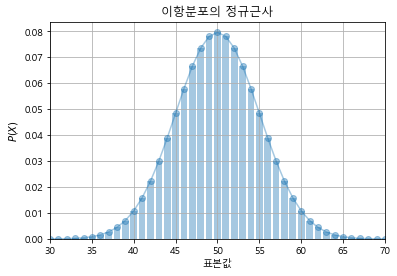

In [92]:
n, mu1  = 100, 0.5
mu2,std = 50, 5
rv1 = sp.stats.binom(n, mu1)
rv2 = sp.stats.norm(mu2, std)

xx = np.arange(n+1)
plt.plot(xx, rv1.pmf(xx), 'o-', alpha=0.4)
plt.bar(xx, rv2.pdf(xx), alpha=0.4)
plt.xlim(30, 70)  # xÏ∂ï Î≤îÏúÑ
plt.xlabel('ÌëúÎ≥∏Í∞í')
plt.ylabel('$P(X)$')
plt.title('Ïù¥Ìï≠Î∂ÑÌè¨Ïùò Ï†ïÍ∑úÍ∑ºÏÇ¨')
plt.grid()
plt.show()

### [Ïã§Ïäµ] ÏòàÏ†ú 7-11 : Ïù¥Ìï≠Î∂ÑÌè¨Ïùò Ï†ïÍ∑úÍ∑ºÏÇ¨ ÌôïÎ•† Íµ¨ÌïòÍ∏∞
5ÏßÄÏÑ†Îã§ÌòïÏù∏ 100Î¨∏Ï†úÎ•º Î¨¥ÏûëÏúÑÎ°ú ÏÑ†Ï†ïÌïòÏó¨ Ï†ïÎãµÏùÑ 14Í∞ú Ïù¥ÏÉÅ 25Í∞ú Ïù¥ÌïòÎ°ú ÎßûÏ∂ú Í∑ºÏÇ¨ÌôïÎ•†ÏùÄ?

In [93]:
# N( np, np.sqrt(np(1-p)) )
n, p, q = 100, 0.2, 0.8 
a, b = 14, 25

# Î∞©Î≤ï1
X = N(n*p, np.sqrt(n*p*q))
get_prob(X, a, b)


# Î∞©Î≤ï2
rv = sp.stats.norm(loc=n*p, scale=np.sqrt(n*p*q))
print(f'P({a}<=X<={b}): {rv.cdf(b) - rv.cdf(a)}')

ÌôïÎ•†: 0.8275
P(14<=X<=25): 0.8275430250642866


**Q**.Ï£ºÏÇ¨ÏúÑÎ•º 720Î≤à ÎçòÏ†∏ÏÑú 1Ïùò ÎààÏù¥ 105Î≤à Ïù¥ÏÉÅ 145Î≤à Ïù¥ÌïòÎ°ú ÎÇòÏò¨ Í∑ºÏÇ¨ÌôïÎ•†ÏùÄ?

In [94]:
# N( np, np.sqrt(np(1-p)) )
n, p, q = 720, 1/6, 5/6 
a, b = 105, 145

# Î∞©Î≤ï1
X = N(n*p, np.sqrt(n*p*q))
get_prob(X, a, b)


# Î∞©Î≤ï2
rv = sp.stats.norm(loc=n*p, scale=np.sqrt(n*p*q))
print(f'P({a}<=X<={b}): {rv.cdf(b) - rv.cdf(a)}')

ÌôïÎ•†: 0.927
P(105<=X<=145): 0.9269831334053658


---------

### ÏßÄÏàòÎ∂ÑÌè¨ 
Îã®ÏúÑÏãúÍ∞ÑÎãπ ÌèâÍ∑† ŒªÎ≤à Î∞úÏÉùÌïòÎäî ÏÇ¨Í±¥Ïùò Î∞úÏÉù Í∞ÑÍ≤©ÏùÑ Îî∞Î•¥Îäî ÌôïÎ•†Î∂ÑÌè¨ 

In [95]:
def Ex(lamda):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lamda * np.exp(-lamda * x)
        else:
            return 0
    return x_range, f

**Q**.ÌïòÎ£®Îãπ ÌèâÍ∑† 2Í±¥Ïùò ÍµêÌÜµÏÇ¨Í≥†Í∞Ä Î∞úÏÉùÌïòÎäî ÏßÄÏó≠ÏóêÏÑú 3Ïùº Ïù¥ÎÇ¥ Îòê ÍµêÌÜµÏÇ¨Í≥†Í∞Ä ÏùºÏñ¥ÎÇ† ÌôïÎ•†


ÌôïÎ•†: 0.9975


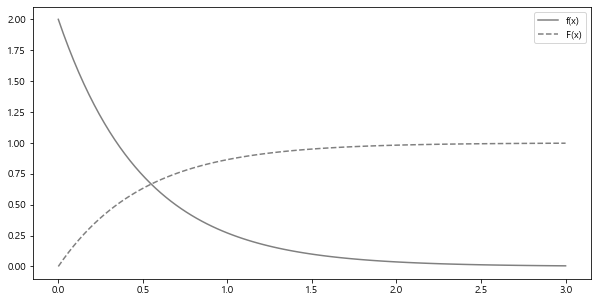

P(X<=3): 0.9975212478233336


In [96]:
lamda, a, b = 2, 0, 3
X = Ex(lamda)

# Î∞©Î≤ï1
get_prob(X, a, b)
plot_prob(X, a, b)

# Î∞©Î≤ï2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

**Q**.1ÏãúÍ∞ÑÎãπ ÌèâÍ∑† 10Î≤à Ïï°ÏÑ∏Ïä§ÌïòÎäî ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú 1Î∂Ñ Ïù¥ÎÇ¥Ïóê Îòê Ïï°ÏÑ∏Ïä§Ìï† ÌôïÎ•†


ÌôïÎ•†: 0.1535


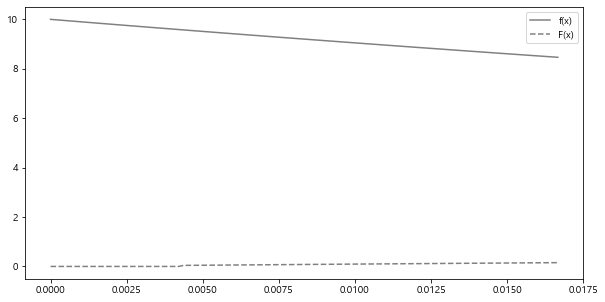

P(X<=0.016666666666666666): 0.15351827510938593


In [97]:
lamda, a, b = 10, 0, 1/60
X = Ex(lamda)

# Î∞©Î≤ï1
get_prob(X, a, b)
plot_prob(X, a, b)

# Î∞©Î≤ï2
rv = sp.stats.expon(scale=1/lamda)
print(f'P(X<={b}): {rv.cdf(b)}')

### t-Î∂ÑÌè¨
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÌååÏÉùÎêú Î∂ÑÌè¨Î°ú Î™®ÌèâÍ∑†Ïùò Íµ¨Í∞ÑÏ∂îÏ†ï Îì±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•†Î∂ÑÌè¨
- ÌòÑÏã§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÏÉÅÎãπÌûà Ïú†ÏÇ¨ÌïòÏßÄÎßå Ïñë ÎÅùÎã®Ïùò ÎπÑÏ§ëÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê ÎπÑÌï¥ Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î∞úÍ≤¨Ìï† Ïàò ÏûàÎã§. Î∂ÑÌè¨Ïùò Î™®ÏñëÏùÑ Î≥º Îïå Ïñë ÎÅù(Íº¨Î¶¨) Î∂ÄÎ∂ÑÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ ÎëêÍªçÎã§Í≥† Ìï¥ÏÑú Ïù¥Î•º Ìåª ÌÖåÏùº(fat tail) ÌòÑÏÉÅÏù¥ÎùºÍ≥† ÌïòÎ©∞ Ìåª ÌÖåÏùºÏùÑ Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Î™®ÌòïÏóê Ï†ÅÌï©Ìïú Í≤ÉÏù¥¬†Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨(student-t distribution)¬†ÌòπÏùÄ¬†tÎ∂ÑÌè¨ÎùºÍ≥† Î∂ÄÎ•¥Îäî Î∂ÑÌè¨Îã§


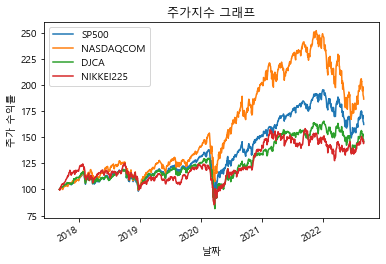

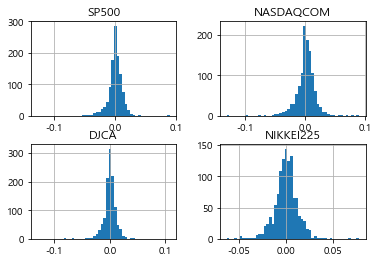

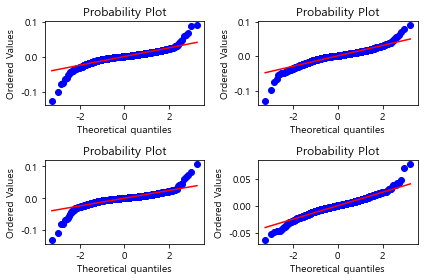

In [98]:
import pandas_datareader.data as pdr

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï£ºÍ∞Ä ÏàòÏùµÎ•†")
plt.title('Ï£ºÍ∞ÄÏßÄÏàò Í∑∏ÎûòÌîÑ')
plt.show()

# ÏßÄÏàòÏùò ÏùºÍ∞Ñ ÏàòÏùµÏú®
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

# Q-Q ÌîåÎ°ØÏúºÎ°ú Ï†ïÍ∑ú(Î∂ÑÌè¨)ÏÑ± ÌôïÏù∏
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

#### * ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨Ïùò Î≥ÄÌôî
- ÏûêÏú†ÎèÑ(dof: degree of freedom) : ÏûêÏú†Ïä§Îü¨Ïö¥ Ï†ïÎèÑ
    
> - ex: 3Í∞úÏùò ÏãúÌóòÏùÑ Î¥§ÎäîÎç∞ ÌèâÍ∑†Ïù¥ 80Ï†êÏù∏ Í≤ΩÏö∞ 2Í∞úÏùò ÏãúÌóòÏóêÏÑú Í∞ÅÍ∞Å 70Ï†ê, 90Ï†êÏùò ÏÑ±Ï†ÅÏùÑ Î∞õÏïòÎã§Î©¥ÎÇòÎ®∏ÏßÄ 1Í∞úÏùò ÏãúÌóò ÏÑ±Ï†ÅÏùÄ ÌèâÍ∑†Ïóê ÏùòÌïòÏó¨ Î∞òÎìúÏãú 80Ï†êÏù¥Ïñ¥Ïïº ÌïúÎã§.Îî∞ÎùºÏÑú Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÌëúÎ≥∏ÏàòÍ∞Ä 3Ïù¥ÏßÄÎßå ÏûêÏú†Î°≠Í≤å Î≥ÄÌï† Ïàò ÏûàÎäî Í≤ÉÏùÄ 2(3-1)Í∞úÏù¥Îã§.

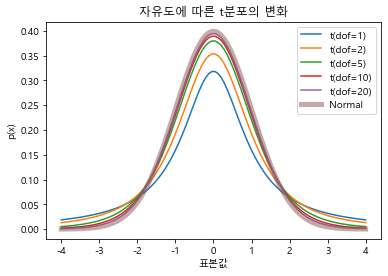

In [99]:
xx = np.linspace(-4, 4, 100)
for dof in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=dof)
    plt.plot(xx, rv.pdf(xx), label=(f"t(dof={dof})") )
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ tÎ∂ÑÌè¨Ïùò Î≥ÄÌôî")
plt.xlabel("ÌëúÎ≥∏Í∞í")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [100]:
# Ïò§Î•∏Ï™Ω Íº¨Î¶¨ÌôïÎ•†: zÏ†ê ÌôïÏù∏
rv = stats.t(5) # dof=5
rv.isf(0.05)    # ÏïåÌåå=0.05

2.015

### Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÌååÏÉùÎêú Î∂ÑÌè¨Î°ú Ï∂îÏ†ïÍ≥º Í≤ÄÏ†ïÏóê ÏÇ¨Ïö©ÌïòÎäî ÌäπÏàòÌïú ÌôïÎ•†Î∂ÑÌè¨
- Î∂ÑÏÇ∞(ÌèâÍ∑†ÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÏπòÏö∞Ïπú Ï†ïÎèÑÏùò Ï≤ôÎèÑ)Ïùò ÌäπÏßïÏùÑ ÌôïÎ•†Î∂ÑÌè¨Î°ú ÎßåÎì† Í≤ÉÏúºÎ°ú Î∂ÑÏÇ∞Ïùò Íµ¨Í∞ÑÏ∂îÏ†ïÏù¥ÎÇò ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏóêÏÑú ÏÇ¨Ïö©


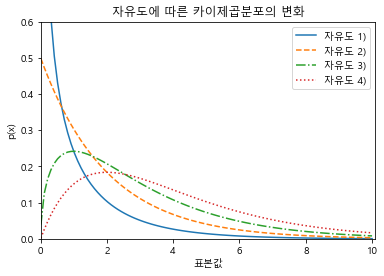

In [101]:
xx = np.linspace(0.01, 10, 100)
dofs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for dof, ls in zip(dofs, lss):
    rv = sp.stats.chi2(df=dof)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=(f"ÏûêÏú†ÎèÑ {dof})"))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Ïùò Î≥ÄÌôî")
plt.xlabel("ÌëúÎ≥∏Í∞í")
plt.ylabel("p(x)")
plt.legend()
plt.show()

In [102]:
# Ïò§Î•∏Ï™Ω Íº¨Î¶¨ÌôïÎ•†: zÏ†ê ÌôïÏù∏
rv = stats.chi2(5)  # dof=5
rv.isf(0.05)        # ÏïåÌåå=0.05

11.070

### FÎ∂ÑÌè¨
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÌååÏÉùÎêú Î∂ÑÌè¨Î°ú Î∂ÑÏÇ∞Î∂ÑÏÑù Îì±ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•†Î∂ÑÌè¨
- Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ ÌÅ¨Í∏∞Í∞Ä ÏÑúÎ°ú Í∞ôÏùÄ ÏßÄ Îã§Î•∏ ÏßÄ ÎπÑÍµêÌï† Îïå ÎÇòÎàóÏÖàÏùÑ ÌôúÏö©ÌïòÏó¨ Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞ÏùÑ ÎπÑÍµêÌïúÎã§

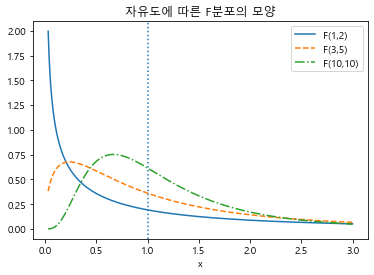

In [103]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ FÎ∂ÑÌè¨Ïùò Î™®Ïñë")
plt.legend()
plt.show()

--------

ÎÅù